In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
df=pd.read_csv('golddata.csv')
df.head()

c:\Users\abhin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\abhin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Imported v0.1.803. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [2]:
df.shape

(2290, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Data Visualisation

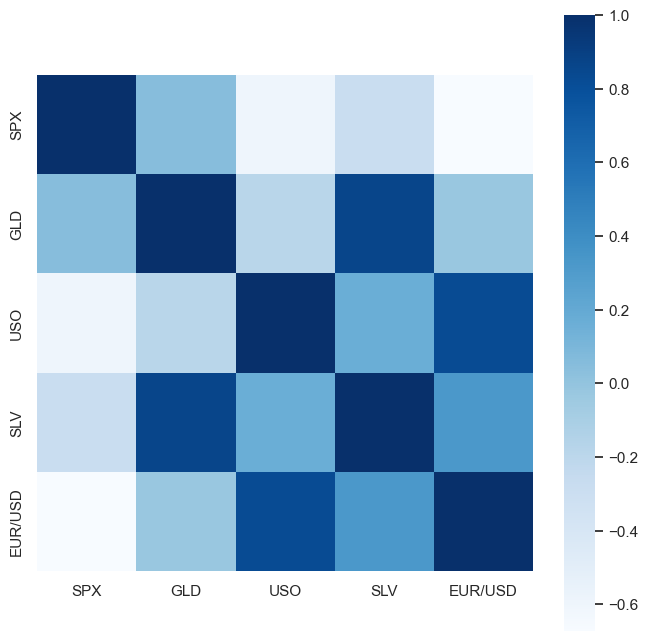

In [6]:
%matplotlib inline
correlation = df[['SPX','GLD','USO','SLV','EUR/USD']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, annot_kws={"size": 8}, cmap='Blues')
plt.show()

In [7]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


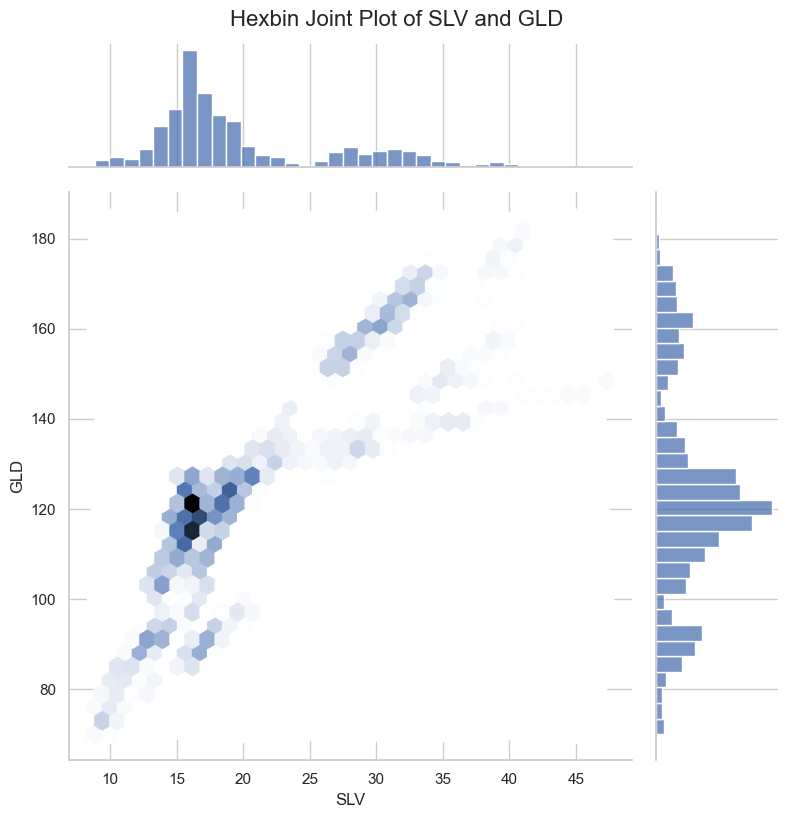

In [8]:
sns.jointplot(x='SLV', y='GLD', kind='hex', data=df, height=8, ratio=4)
plt.suptitle('Hexbin Joint Plot of SLV and GLD', fontsize=16, y=1.02)
plt.show()

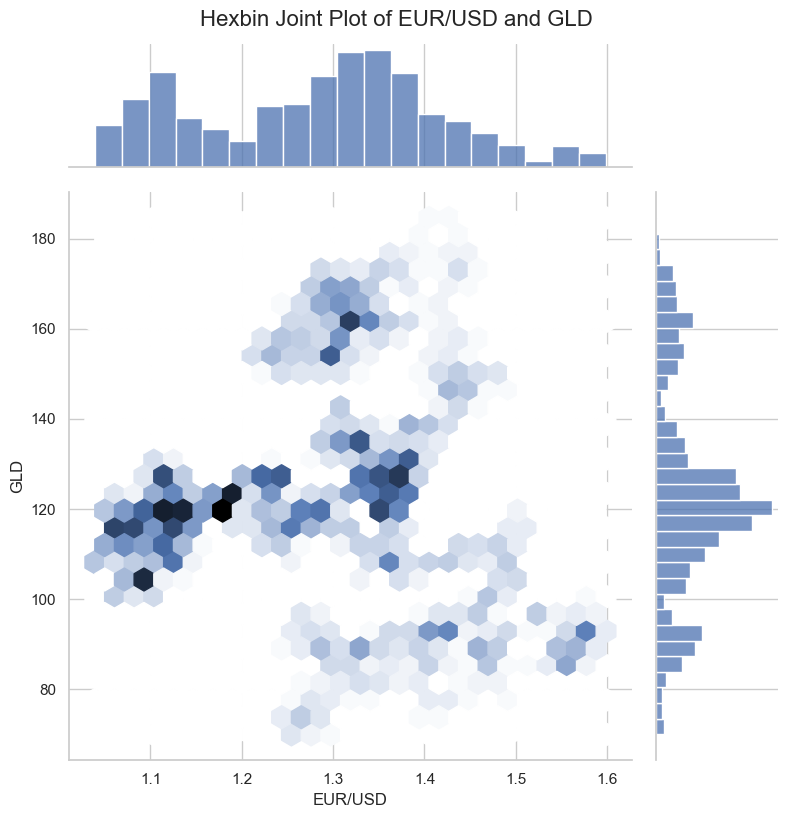

In [9]:
sns.jointplot(x='EUR/USD', y='GLD', kind='hex', data=df, height=8, ratio=4)
plt.suptitle('Hexbin Joint Plot of EUR/USD and GLD', fontsize=16, y=1.02)
plt.show()

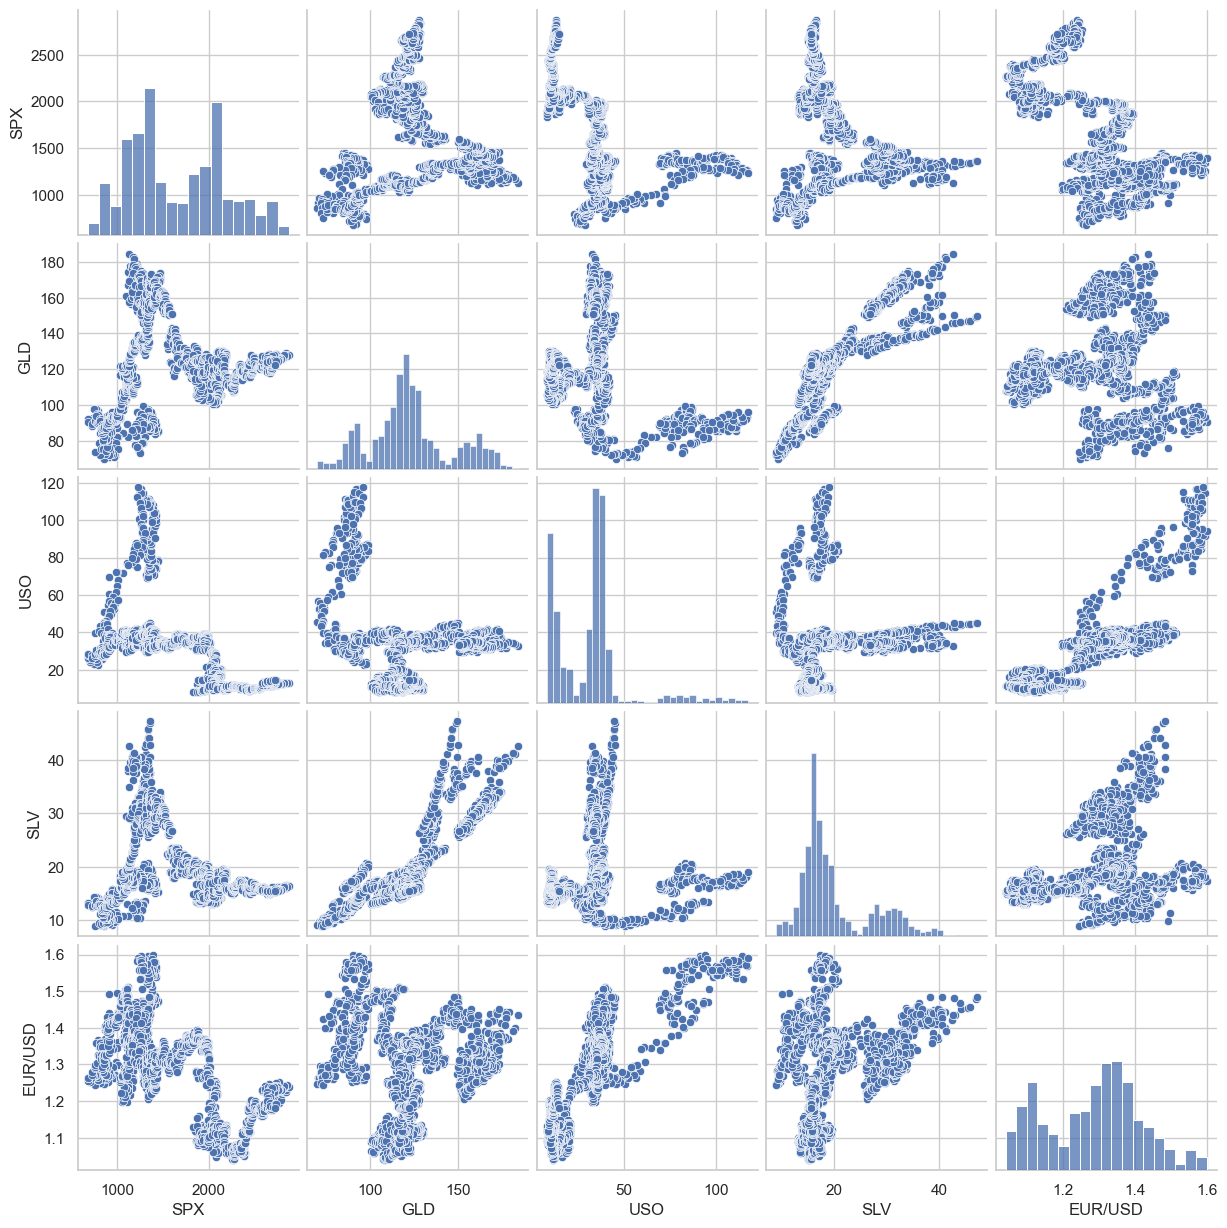

In [10]:
sns.pairplot(df[['SPX','GLD','USO','SLV','EUR/USD']])

Shape of your Data Set loaded: (2290, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Date']
To fix these data quality issues in the dataset, import FixDQ

AttributeError: module 'matplotlib' has no attribute 'colormaps'

Number of All Scatter Plots = 15


<Figure size 1000x600 with 0 Axes>

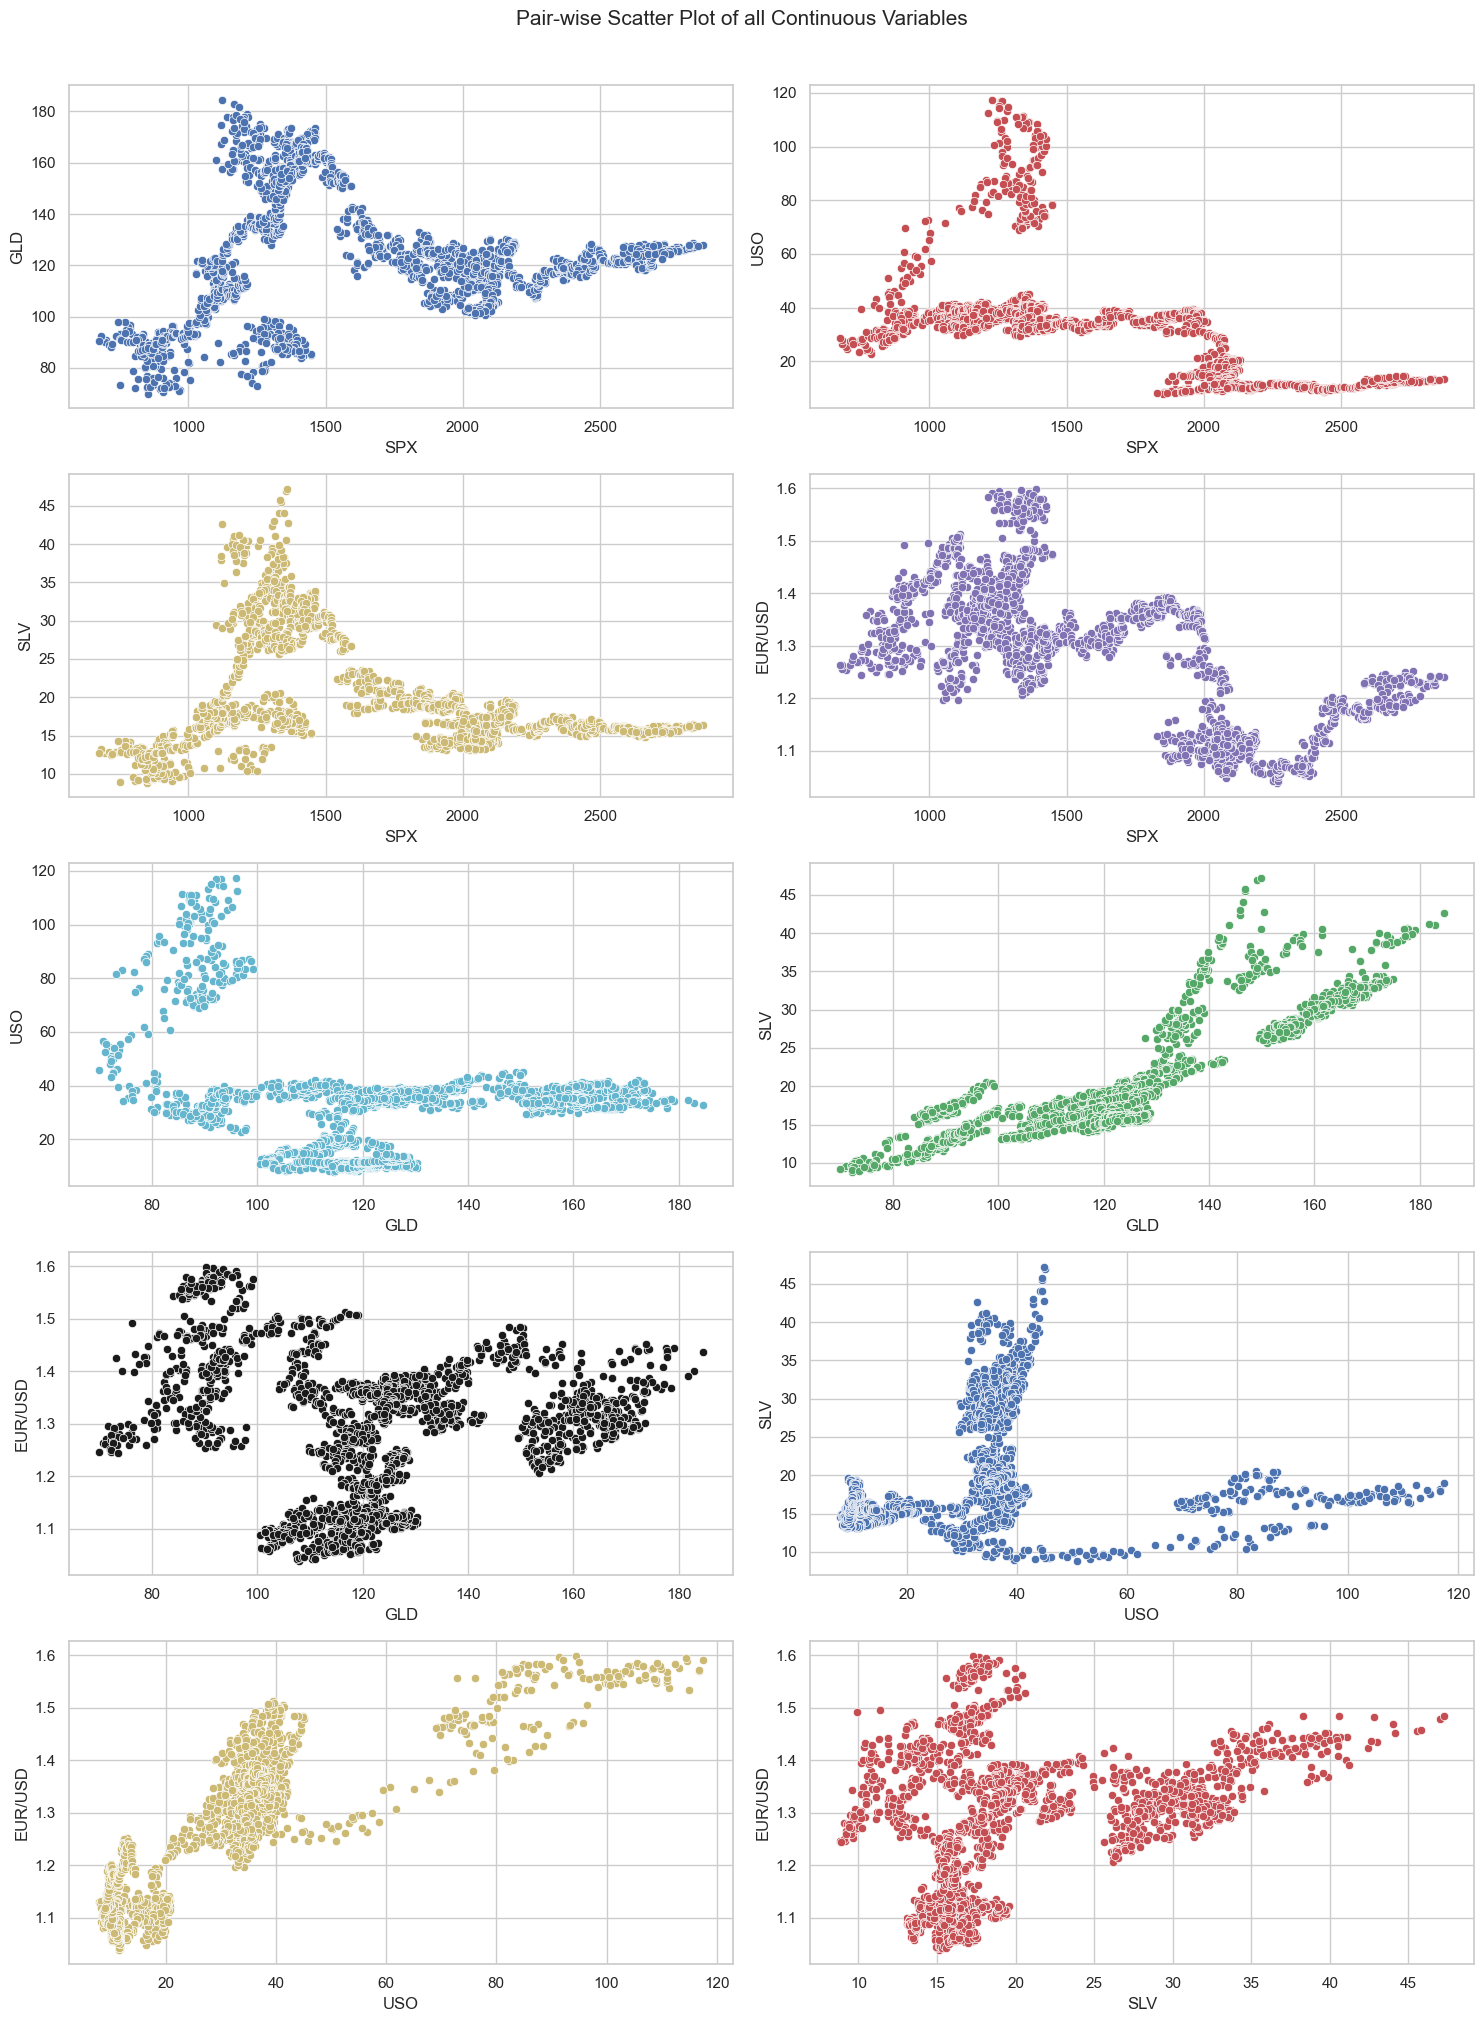

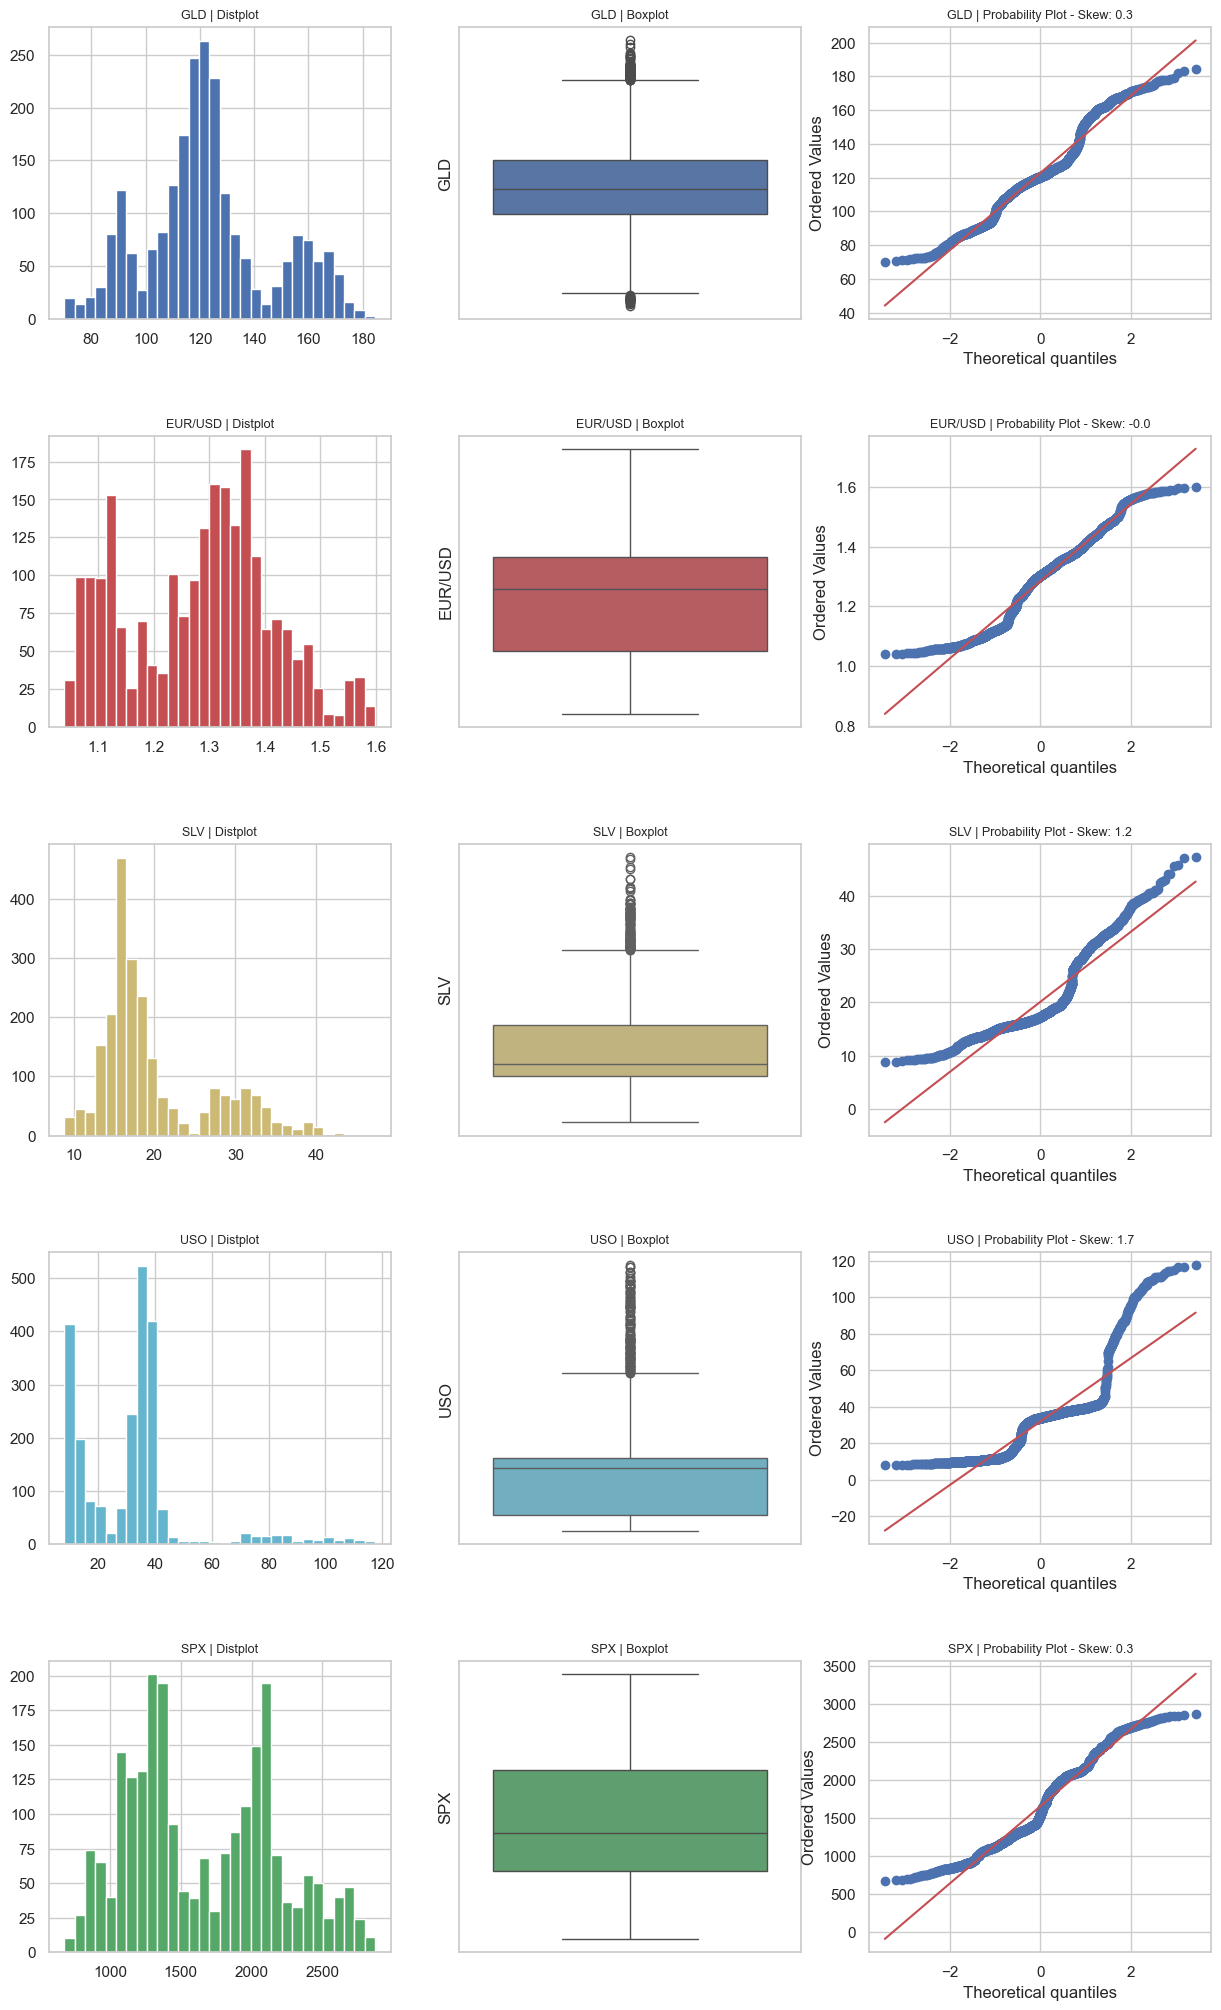

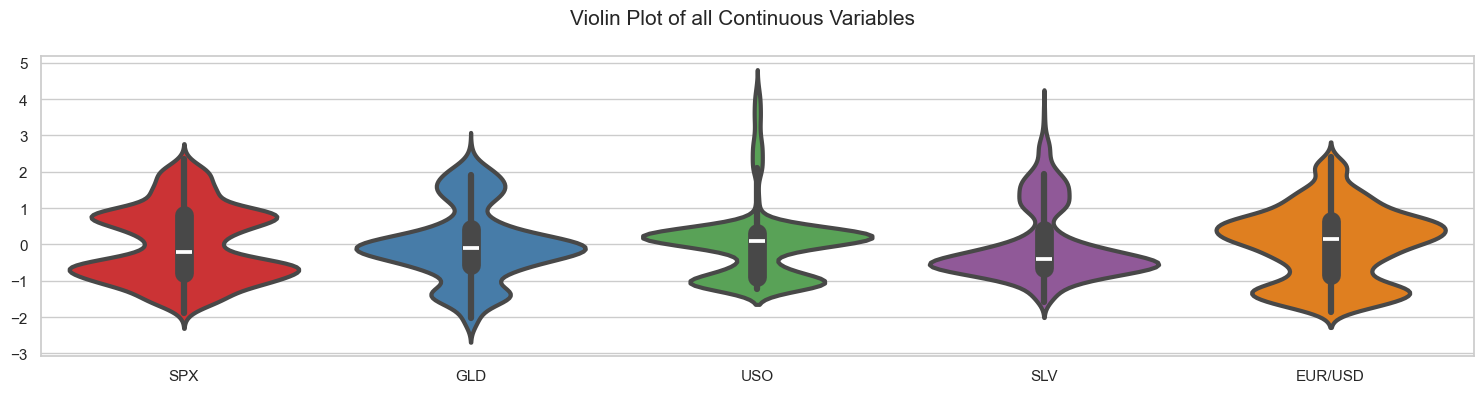

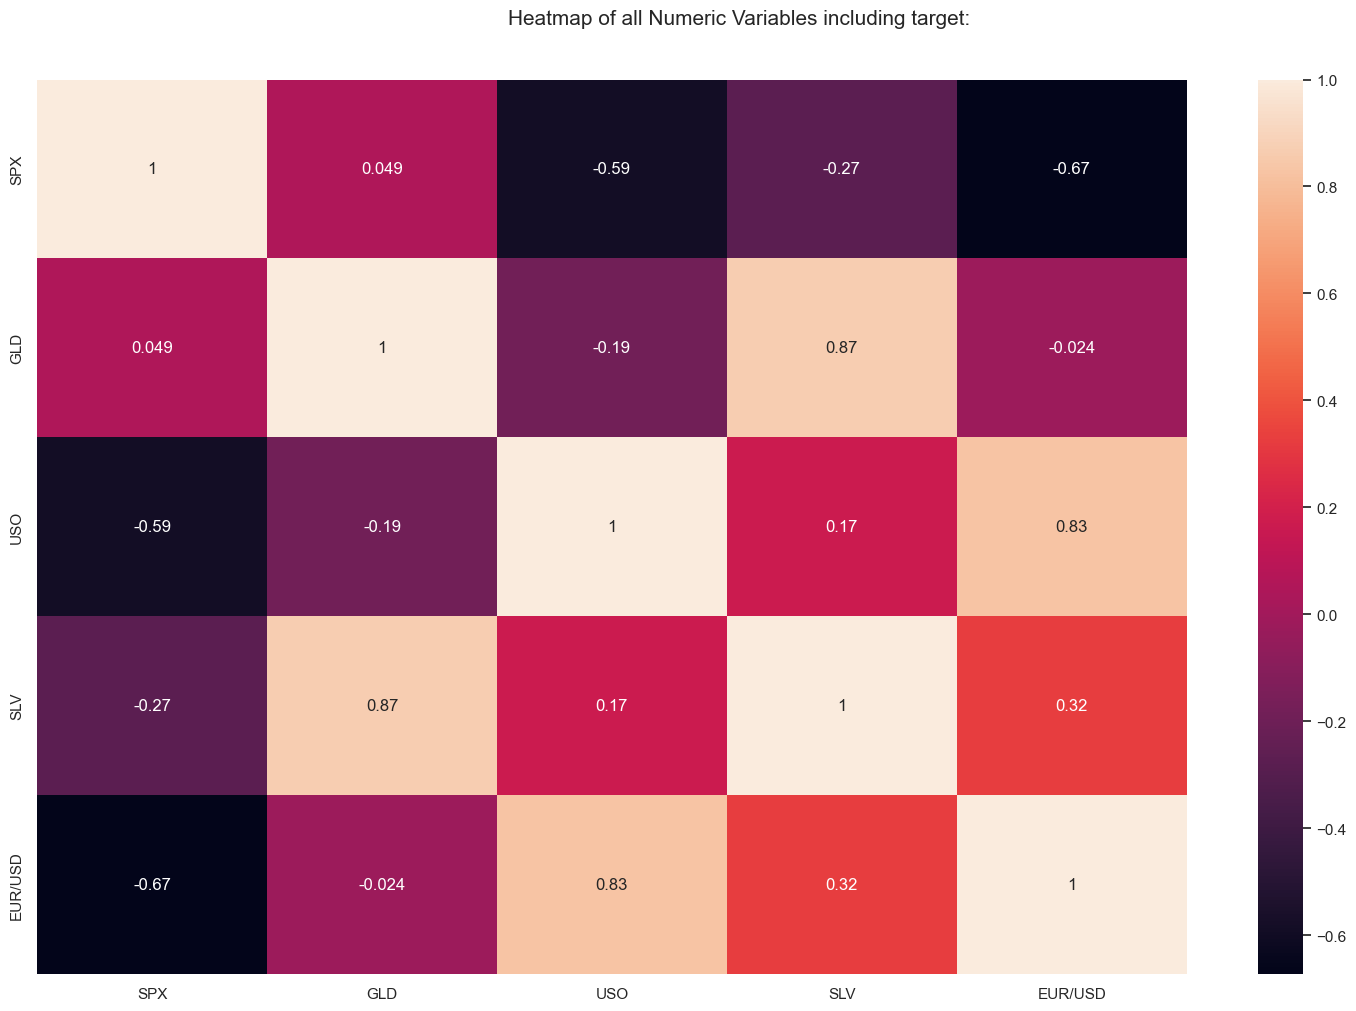

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [11]:
%matplotlib inline

plt.figure(figsize = (10, 6))
AV = AutoViz_Class()
df_av = AV.AutoViz('golddata.csv')
plt.show()

# TRAIN, TEST, CV data split

In [12]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# ML Model Comparision

1. SVM Regressor

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

param_grid = {
    'C': [0.1, 1, 10, 100],         
    'kernel': ['linear', 'rbf'],   
    'gamma': ['scale', 'auto', 0.1, 1]  
}

svm_regressor = SVR()

grid_search = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm_regressor = SVR(**best_params)
best_svm_regressor.fit(X_train, y_train)

y_pred = best_svm_regressor.predict(X_val)

svr_mse = mean_squared_error(y_val, y_pred)
svr_r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error on Test Set: {svr_mse}')
print(f'r2 score on Test Set: {svr_r2}')

print(f'Best Hyperparameters: {best_params}')


Mean Squared Error on Test Set: 42.93941418997466
r2 score on Test Set: 0.9255657788418441
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


2. Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
}

linear_regression = LinearRegression()

grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_linear_regression = LinearRegression(**best_params)
best_linear_regression.fit(X_train, y_train)

y_pred = best_linear_regression.predict(X_val)

lr_mse= mean_squared_error(y_val, y_pred)
lr_r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error on Test Set: {lr_mse}')
print(f'r2 score on Test Set: {lr_r2}')

print(f'Best Hyperparameters: {best_params}')


Mean Squared Error on Test Set: 46.32063615553109
r2 score on Test Set: 0.9197045292575914
Best Hyperparameters: {'fit_intercept': True}


3. Elastic Net Regression

In [33]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False],
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_elastic_net = ElasticNet(**best_params)
best_elastic_net.fit(X_train, y_train)

y_pred = best_elastic_net.predict(X_val)

en_mse = mean_squared_error(y_val, y_pred)
en_r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error on Test Set: {en_mse}')
print(f'r2 score on Test Set: {en_r2}')

print(f'Best Hyperparameters: {best_params}')


Mean Squared Error on Test Set: 46.30317177185544
r2 score on Test Set: 0.9197348032569327
Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.7}


4. Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_random_forest = RandomForestRegressor(**best_params, random_state=42)
best_random_forest.fit(X_train, y_train)

y_pred = best_random_forest.predict(X_val)

rf_mse = mean_squared_error(y_val, y_pred)
rf_r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error on Test Set: {rf_mse}')
print(f'r2 score on Test Set: {rf_r2}')  #for actual test data r2:0.9904147569556709


print(f'Best Hyperparameters: {best_params}')


Mean Squared Error on Test Set: 4.453284305967696
r2 score on Test Set: 0.9922803616406127
Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


5. eXtreme Gradient Boosting

In [37]:
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_xgb_regressor = XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)
y_pred = best_xgb_regressor.predict(X_val)
xgb_mse = mean_squared_error(y_val, y_pred)
xgb_r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error on Test Set: {xgb_mse}')
print(f'r2 score on Test Set: {xgb_r2}')

print(f'Best Hyperparameters: {best_params}')


Mean Squared Error on Test Set: 5.235533425249842
r2 score on Test Set: 0.9909243556250716
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}


6. CatBoost

In [31]:
from catboost import CatBoostRegressor

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [50, 100, 150, 200, 300, 400, 500],
}

catboost_regressor = CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=False)

grid_search = GridSearchCV(catboost_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_catboost_regressor = CatBoostRegressor(loss_function='RMSE', **best_params, random_state=42, verbose=False)
best_catboost_regressor.fit(X_train, y_train)

y_pred = best_catboost_regressor.predict(X_val)

cb_mse = mean_squared_error(y_val, y_pred)
cb_r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error on Test Set: {cb_mse}')
print(f'r2 score on Test Set: {cb_r2}')

print(f'Best Hyperparameters: {best_params}')


Mean Squared Error on Test Set: 4.630041003841231
r2 score on Test Set: 0.9919739590641246
Best Hyperparameters: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.2}


Building Our Own Stacking model

In [38]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
estimators = [
    #('elastic_net', best_elastic_net),
    ('random_forest', best_random_forest),
    ('xgb_regressor', best_xgb_regressor),
    ('catboost_regressor', best_catboost_regressor)
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_combined):
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    y_train_fold, y_test_fold = y_combined[train_index], y_combined[test_index]

    stacking_model.fit(X_train_fold, y_train_fold)
    predictions = stacking_model.predict(X_test_fold)

    mse = mean_squared_error(y_test_fold, predictions)
    r2 = r2_score(y_test_fold, predictions)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold - Mean Squared Error: {mse}, R^2 Score: {r2}")

print("\nAverage Metrics Across Folds:")
print("Mean Squared Error (MSE):", np.mean(mse_scores))
print("R^2 Score:", np.mean(r2_scores))


Fold - Mean Squared Error: 5.553469346937448, R^2 Score: 0.9910172472287202
Fold - Mean Squared Error: 6.660433752377423, R^2 Score: 0.9862165854923832
Fold - Mean Squared Error: 3.159940340233733, R^2 Score: 0.9934744155348881
Fold - Mean Squared Error: 6.525436099378686, R^2 Score: 0.9893834922478317
Fold - Mean Squared Error: 5.9184277227101205, R^2 Score: 0.9886057469889731
Fold - Mean Squared Error: 2.9627210066954635, R^2 Score: 0.9947218233109731
Fold - Mean Squared Error: 4.558710198638579, R^2 Score: 0.9910789616728208
Fold - Mean Squared Error: 7.214760951358389, R^2 Score: 0.9861209510911442
Fold - Mean Squared Error: 3.2544988277549805, R^2 Score: 0.994019169238848
Fold - Mean Squared Error: 5.3086814210575675, R^2 Score: 0.990190385264314

Average Metrics Across Folds:
Mean Squared Error (MSE): 5.111707966714239
R^2 Score: 0.9904828778070897


In [39]:
predictions_test = stacking_model.predict(X_test)

mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print("Test Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R^2 Score:", r2_test)


Test Set Metrics:
Mean Squared Error (MSE): 4.679444946645039
R^2 Score: 0.9912840685011688
